In [41]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from utils.data import alfred_dataset, gtrend_dataset

sns.set_theme(style='whitegrid')

%reload_ext autoreload
%autoreload 2

# Plot Helper

In [68]:
def plot_time_series(df, col):
    """
    Plot a time series line plot using Seaborn.
    
    Parameters:
        dataframe (DataFrame): The input DataFrame containing time series data.
        date_column (str): The name of the column containing date values.
        value_column (str): The name of the column containing numeric values.
        
    Returns:
        None
    """
    # Convert date column to datetime if it's not already
    df['date'] = pd.to_datetime(df['date'])
    
    # Set figure size
    plt.figure(figsize=(10, 6))
    
    # Plot time series
    sns.lineplot(data=df, x='date', y=col)
    
    # Add title and labels
    plt.title('Time Series Plot')
    plt.xlabel('Date')
    plt.ylabel('Value')
    
    # Show plot
    plt.show()

def plot_dual_time_series(df, col1, l1, col2, l2):
    """
    Plot a time series line plot with dual y-axes using Seaborn.
    
    Parameters:
        dataframe (DataFrame): The input DataFrame containing time series data.
        date_column (str): The name of the column containing date values.
        value1_column (str): The name of the first column containing numeric values.
        value2_column (str): The name of the second column containing numeric values.
        
    Returns:
        None
    """
    # Convert date column to datetime if it's not already
    df['date'] = pd.to_datetime(df['date'])
    
    # Set figure size
    plt.figure(figsize=(10, 6))
    
    # Plot first time series
    ax1 = sns.lineplot(data=df, x='date', y=col1, color='royalblue', label=l1)
    
    # Create secondary y-axis
    ax2 = ax1.twinx()
    
    # Plot second time series on secondary y-axis
    sns.lineplot(data=df, x='date', y=col2, color='black', ax=ax2, label=l2)

    # Combine legend entries from both axes
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='best')
    
    # Add title and labels
    ax1.set_title('Time Series Comparison')
    ax1.set_xlabel('Date')
    ax1.set_ylabel(l1)
    ax2.set_ylabel(l2)
    
    # Show plot
    plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

def plot_multiple_dfs(dfs, xcol, ycol):
    """
    Plot a column against another for each DataFrame in a list on the same figure.
    
    Parameters:
        dataframes (list of DataFrames): The list of input DataFrames containing the data to be plotted.
        x_column (str): The name of the column containing the x-values.
        y_column (str): The name of the column containing the y-values.
        
    Returns:
        None
    """
    # Set figure size
    plt.figure(figsize=(10, 6))
    
    # Plot each DataFrame
    for k, df in dfs.items():
        sns.lineplot(data=df, x=xcol, y=ycol, label=k)
    
    # Add title and labels
    plt.title(f'{ycol} Comparison')
    plt.xlabel(xcol)
    plt.ylabel(ycol)
    
    # Show plot
    plt.legend()  # Add legend for each DataFrame
    plt.show()



# Plots

In [46]:
gtrend_df = gtrend_dataset(['inflation'])
gtrend_df

,date,inflation
0,2010-01-01,31
1,2010-02-01,33
2,2010-03-01,33
3,2010-04-01,32
4,2010-05-01,35
...,...,...
169,2024-02-01,72
170,2024-03-01,63
171,2024-04-01,65
172,2024-05-01,63


In [47]:
cpi_df = alfred_dataset(['CPI'])
cpi_df['pi-CPI'] = 100*cpi_df['CPI'].pct_change(periods=12)
cpi_df = cpi_df.dropna()
cpi_df

,date,CPI,pi-CPI
12,1948-01-01,23.680,10.242086
13,1948-02-01,23.670,9.481961
14,1948-03-01,23.500,6.818182
15,1948-04-01,23.820,8.272727
16,1948-05-01,24.010,9.384966
...,...,...,...
923,2023-12-01,308.742,3.323160
924,2024-01-01,309.685,3.105981
925,2024-02-01,311.054,3.165743
926,2024-03-01,312.230,3.475131


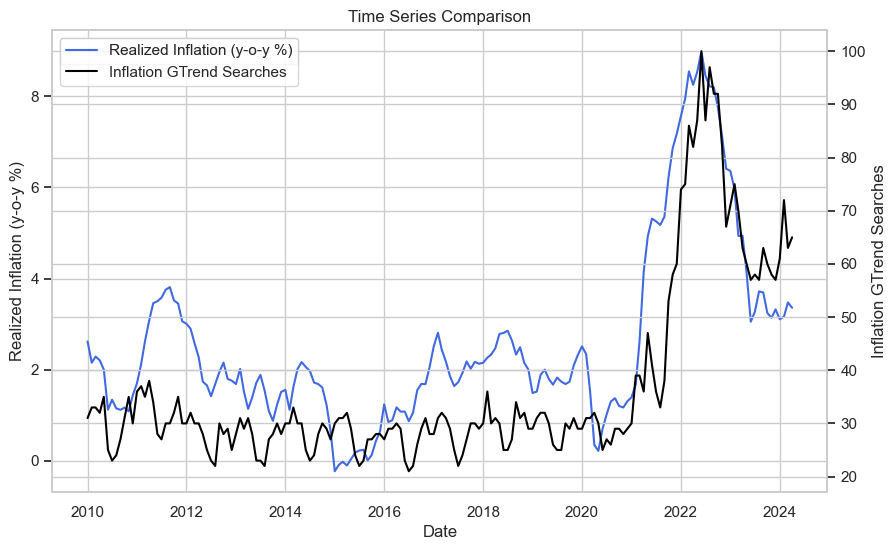

In [48]:
df = gtrend_df.merge(cpi_df, on='date')
plot_dual_time_series(df, 'pi-CPI', 'Realized Inflation (y-o-y %)', 'inflation', 'Inflation GTrend Searches')

In [52]:
news_df = pd.read_json('data/nowcaster/news_index.jsonl', lines=True)
news_df

,date,NEWS
0,2010-01-01,100.000757
1,2010-02-01,100.599369
2,2010-03-01,100.663992
3,2010-04-01,101.086770
4,2010-05-01,101.073790
...,...,...
163,2023-08-01,113.206184
164,2023-09-01,113.338719
165,2023-10-01,113.484654
166,2023-11-01,113.586926


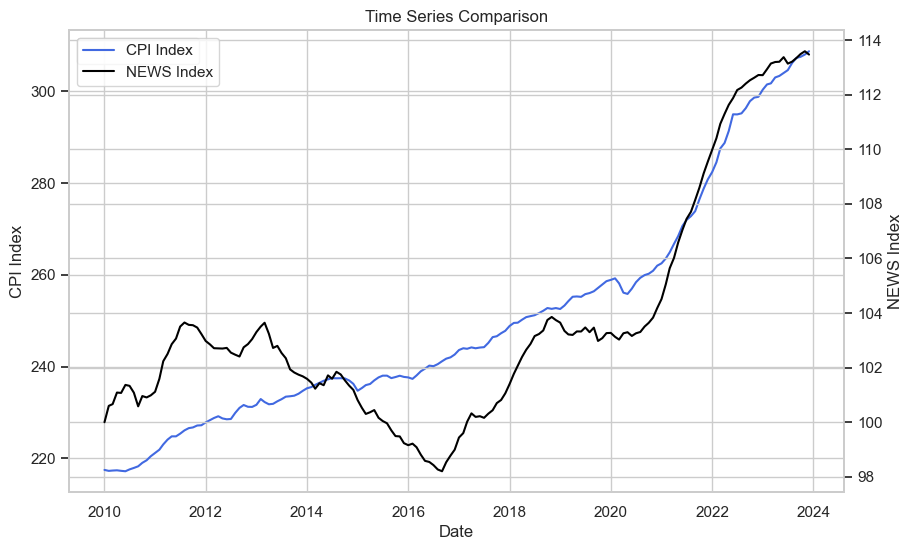

In [54]:
df = news_df.merge(cpi_df, on='date')
plot_dual_time_series(df, 'CPI', 'CPI Index', 'NEWS', 'NEWS Index')

In [72]:
TRAIN_DATA_PATH = "data/training_stats"

bert_df = pd.read_csv(f'{TRAIN_DATA_PATH}/bert.csv')
finbert_df = pd.read_csv(f'{TRAIN_DATA_PATH}/finbert.csv')
roberta_df = pd.read_csv(f'{TRAIN_DATA_PATH}/roberta.csv')

dfs = {'BERT': bert_df, 'FinBERT': finbert_df, 'FinDistillRoBERTa': roberta_df}

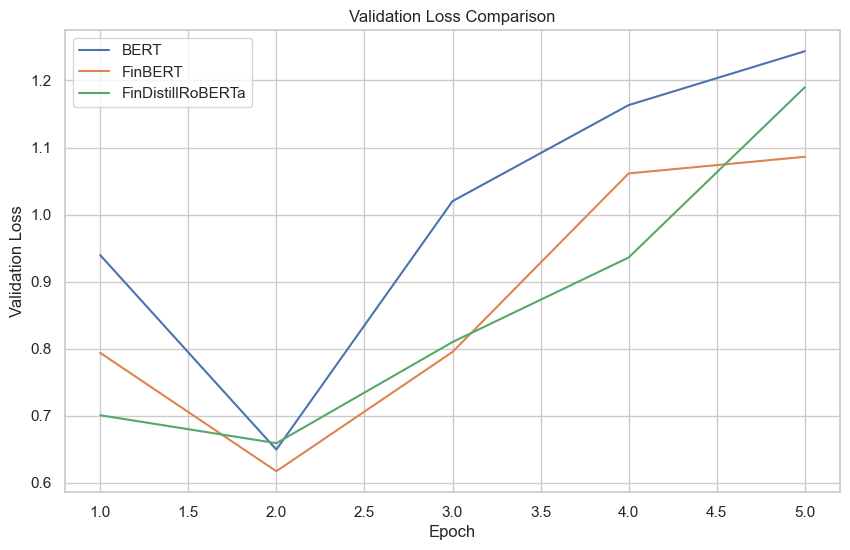

In [73]:
plot_multiple_dfs(dfs, 'Epoch', 'Validation Loss')

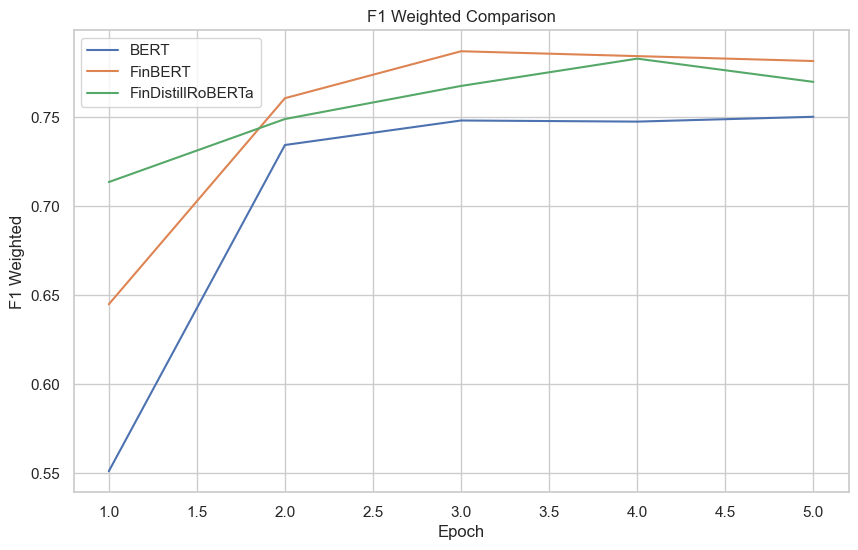

In [74]:
plot_multiple_dfs(dfs, 'Epoch', 'F1 Weighted')